<a href="https://colab.research.google.com/github/SathishkumarNagappan/customer/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import numpy as np

In [158]:
data = pd.read_csv('train.csv')

In [159]:
data.shape

(45211, 11)

In [160]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [161]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [162]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [163]:
# Find the unique values of each column
data.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [164]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [165]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [166]:
data.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [167]:
data.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [168]:
data.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [169]:
data.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [170]:
data.dur.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [171]:
data.num_calls.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [172]:
data.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [173]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [174]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [175]:
#Detect the outliers
data.dur.quantile(0.75)

319.0

In [176]:
iqr = data.dur.quantile(0.75)-data.dur.quantile(0.25)
iqr
upper_threshold = data.dur.quantile(0.75) + (1.5 * iqr)
lower_threshold = data.dur.quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(643.0, -221.0)

In [177]:
sum(data.dur > 643)

3235

In [178]:
data.dur = data.dur.clip(-221, 643)

In [179]:
data.dur.describe()

count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: dur, dtype: float64

In [180]:
 sum(data.dur <=15)

852

In [181]:
data.query('dur<=15 & y=="yes"')

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
24103,58,management,divorced,tertiary,unknown,29,oct,11,1,unknown,yes
27715,23,unemployed,single,primary,telephone,27,nov,8,1,unknown,yes


In [182]:
data.num_calls.quantile(0.75)

3.0

In [183]:
iqr = data.num_calls.quantile(0.75)-data.num_calls.quantile(0.25)
iqr
upper_threshold = data.num_calls.quantile(0.75) + (1.5 * iqr)
lower_threshold = data.num_calls.quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(6.0, -2.0)

In [184]:
sum(data.num_calls > 6)

3064

In [185]:
data.dur = data.dur.clip(-2.0, 6)

In [186]:
data.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [187]:
#Missing values
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [188]:
data = data.drop_duplicates()

In [189]:
data.job.value_counts()

blue-collar      8863
management       8654
technician       7156
admin.           4923
services         3935
retired          2211
self-employed    1560
entrepreneur     1469
unemployed       1285
housemaid        1224
student           929
unknown           288
Name: job, dtype: int64

In [190]:
data.job = data.job.str.replace("unknown", "blue-collar")

<ipython-input-190-991da5e474dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.job = data.job.str.replace("unknown", "blue-collar")


In [191]:
data.education_qual.value_counts()

secondary    21706
tertiary     12412
primary       6536
unknown       1843
Name: education_qual, dtype: int64

In [192]:
data.education_qual = data.education_qual.str.replace("unknown", "secondary")

<ipython-input-192-d44be154d523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.education_qual = data.education_qual.str.replace("unknown", "secondary")


In [193]:
data.call_type.value_counts()

cellular     27657
unknown      11943
telephone     2897
Name: call_type, dtype: int64

In [194]:
data.call_type = data.call_type.str.replace("unknown", "telephone")

<ipython-input-194-87e2bc8b396a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.call_type = data.call_type.str.replace("unknown", "telephone")


In [195]:
data.education_qual.value_counts()

secondary    23549
tertiary     12412
primary       6536
Name: education_qual, dtype: int64

In [196]:
data = data.drop(columns = ['prev_outcome'])

In [197]:
#Data in right format
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
y                 object
dtype: object

In [198]:
#Duplicates
data = data.drop_duplicates()

In [199]:
data.shape

(41527, 10)

In [200]:
#Correlation
#data.corr()

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,58,management,married,tertiary,telephone,5,may,6,1,no
1,44,technician,single,secondary,telephone,5,may,6,1,no
2,33,entrepreneur,married,secondary,telephone,5,may,6,1,no
3,47,blue-collar,married,secondary,telephone,5,may,6,1,no
4,33,blue-collar,single,secondary,telephone,5,may,6,1,no


<function matplotlib.pyplot.show(close=None, block=None)>

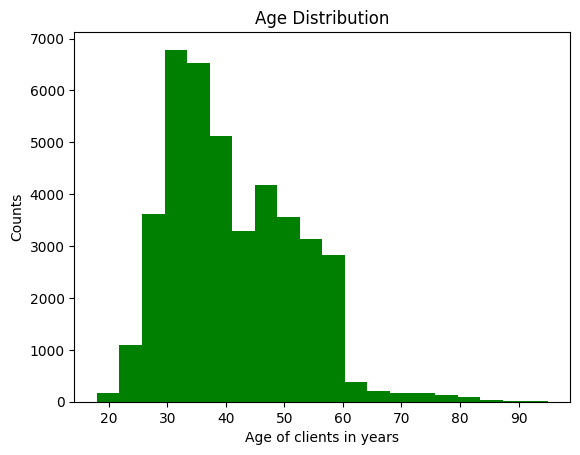

In [203]:
# EDA
plt.hist(data['age'], bins = 20, color = "green")
plt.title("Age Distribution")
plt.xlabel("Age of clients in years")
plt.ylabel("Counts")
plt.show

<Axes: >

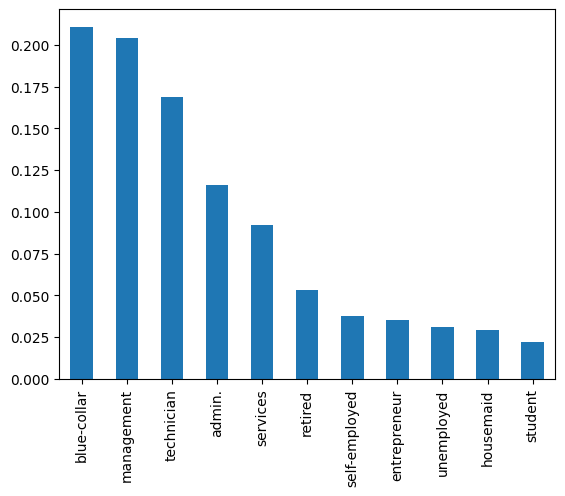

In [204]:
data['job'].value_counts(normalize = True).plot(kind='bar')

In [205]:
data['target'] = data.y
data['target'] = data.target.map({'yes' : 1, 'no' : 0})
data.target

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 41527, dtype: int64

<Axes: xlabel='job', ylabel='target'>

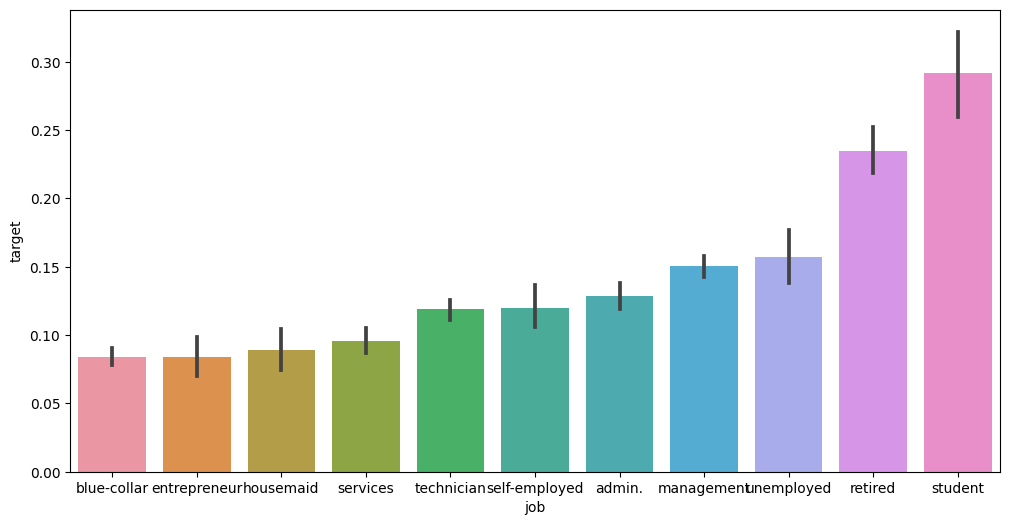

In [206]:
job_convertion_rates = data.groupby("job")["target"].mean()
sorted_jobs = job_convertion_rates.reset_index().sort_values('target')['job']
plt.figure(figsize=(12,6))
sns.barplot(x = 'job', y = 'target', data = data, order = sorted_jobs)

<Axes: xlabel='education_qual', ylabel='target'>

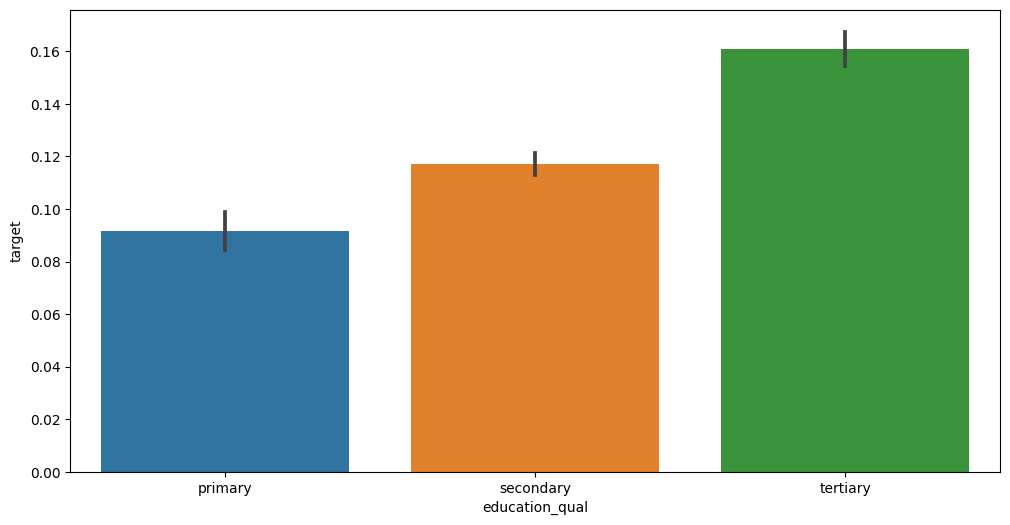

In [207]:
education_qual_convertion_rates = data.groupby('education_qual')['target'].mean()
sorted_jobs = education_qual_convertion_rates.reset_index().sort_values('target')['education_qual']
plt.figure(figsize=(12,6))
sns.barplot(x = 'education_qual', y = 'target', data = data, order = sorted_jobs)

<Axes: xlabel='marital', ylabel='target'>

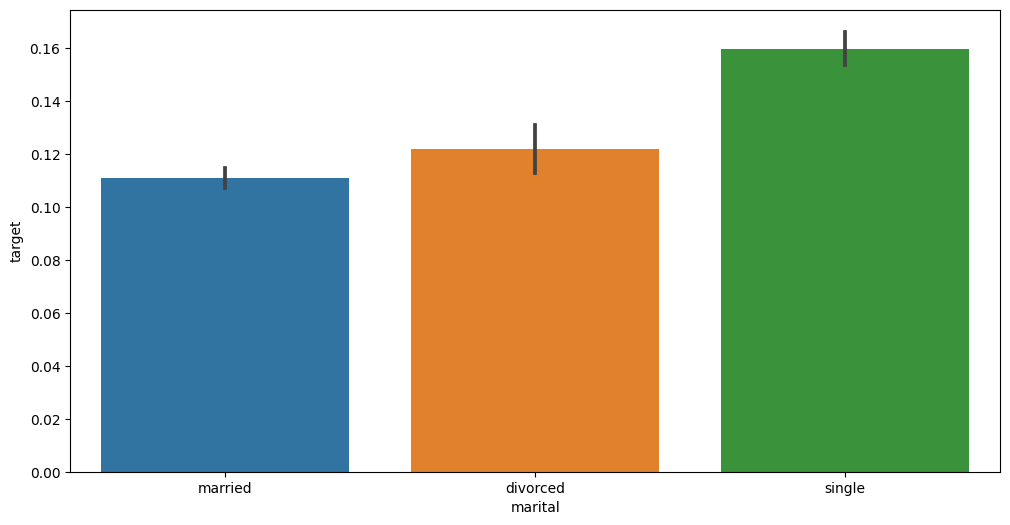

In [208]:
marital_convertion_rates = data.groupby('marital')['target'].mean()
sorted_jobs = marital_convertion_rates.reset_index().sort_values('target')['marital']
plt.figure(figsize=(12,6))
sns.barplot(x = 'marital', y = 'target', data = data, order = sorted_jobs)

<Axes: xlabel='mon', ylabel='target'>

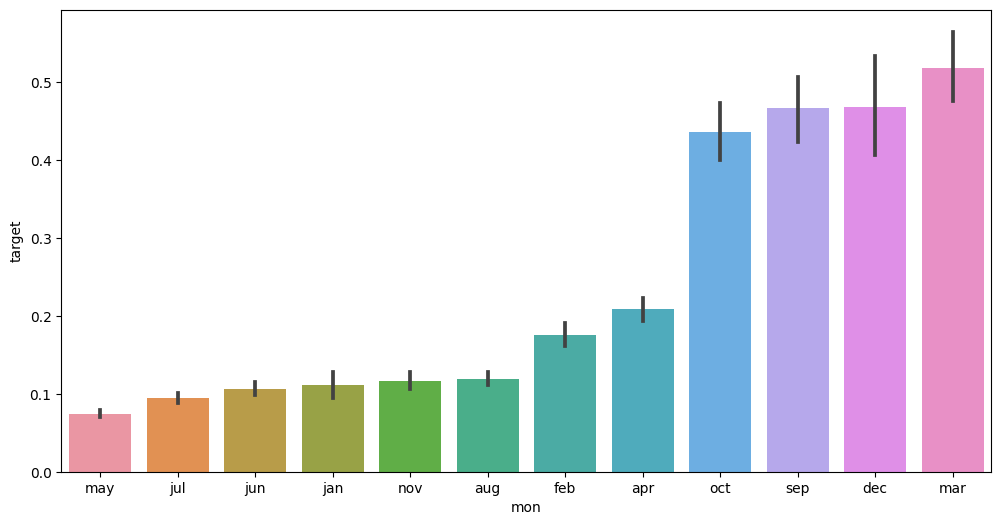

In [209]:
mon_convertion_rates = data.groupby('mon')['target'].mean()
sorted_jobs = mon_convertion_rates.reset_index().sort_values('target')['mon']
plt.figure(figsize=(12,6))
sns.barplot(x = 'mon', y = 'target', data = data, order = sorted_jobs)

<Axes: xlabel='call_type', ylabel='target'>

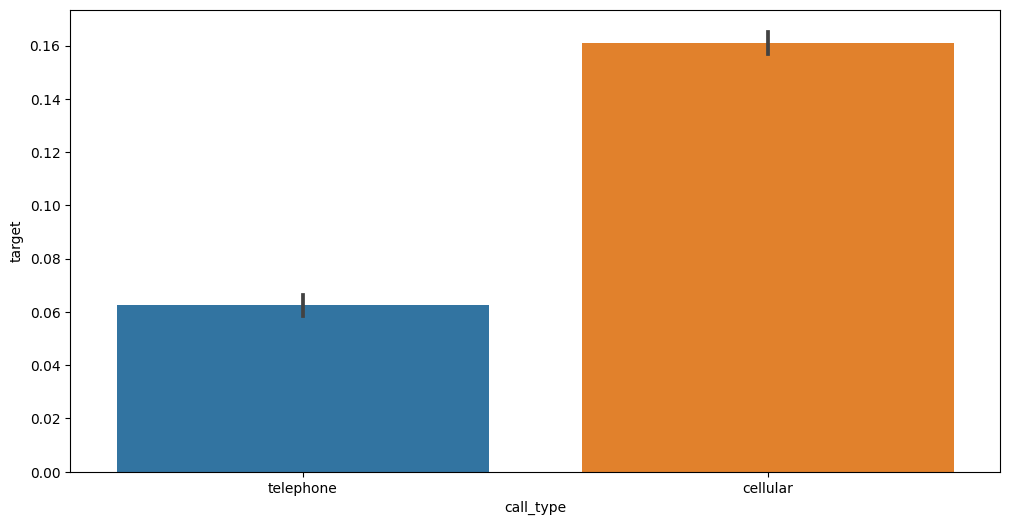

In [210]:
call_type_convertion_rates = data.groupby('call_type')['target'].mean()
sorted_jobs = call_type_convertion_rates.reset_index().sort_values('target')['call_type']
plt.figure(figsize=(12,6))
sns.barplot(x = 'call_type', y = 'target', data = data, order = sorted_jobs)

<Axes: xlabel='dur', ylabel='target'>

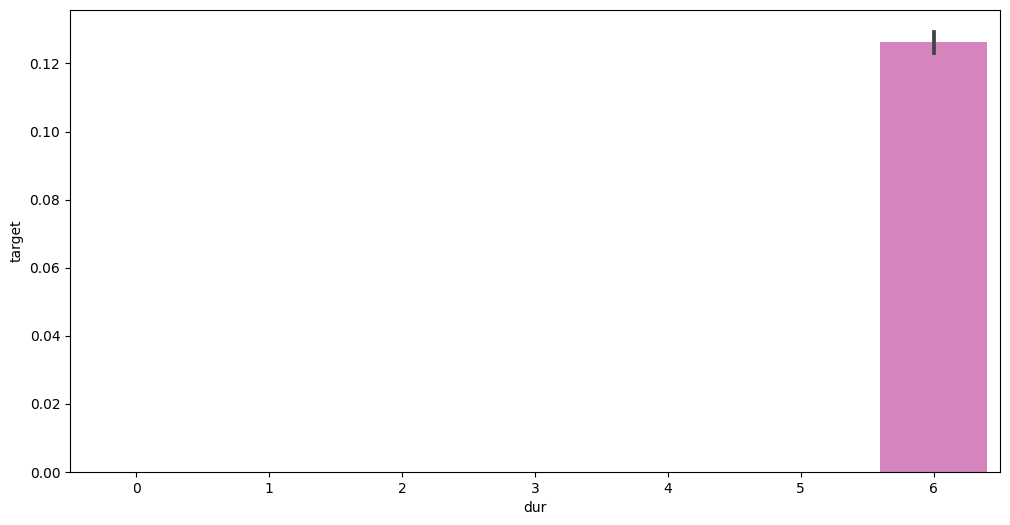

In [211]:
dur_convertion_rates = data.groupby('dur')['target'].mean()
sorted_jobs = dur_convertion_rates.reset_index().sort_values('target')['dur']
plt.figure(figsize=(12,6))
sns.barplot(x = 'dur', y = 'target', data = data, order = sorted_jobs)

In [212]:
#Encoding
data['job'] = data.job.map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4, 'self-employed':5, 'admin.':6, 'management':7, 'employed':8, 'retired':9, 'student':10})
data.job

0        7.0
1        4.0
2        1.0
3        0.0
4        0.0
        ... 
45206    4.0
45207    9.0
45208    9.0
45209    0.0
45210    1.0
Name: job, Length: 41527, dtype: float64

In [213]:
data['marital'] = data.marital.map({'married':0, 'divorced':1, 'single':2})
data.marital

0        0
1        2
2        0
3        0
4        2
        ..
45206    0
45207    1
45208    0
45209    0
45210    0
Name: marital, Length: 41527, dtype: int64

In [214]:
data['education_qual'] = data.education_qual.map({'primary':0, 'secondary':1, 'tertiary':2})
data.education_qual

0        2
1        1
2        1
3        1
4        1
        ..
45206    2
45207    0
45208    1
45209    1
45210    1
Name: education_qual, Length: 41527, dtype: int64

In [215]:
data['mon'] = data.mon.map({'may':0, 'jul':1, 'jun':2, 'jan':3, 'nov':4, 'aug':5, 'feb':6, 'apr':7, 'oct':8, 'sep':9, 'dec':10, 'mar':11})
data.mon

0        0
1        0
2        0
3        0
4        0
        ..
45206    4
45207    4
45208    4
45209    4
45210    4
Name: mon, Length: 41527, dtype: int64

In [216]:
data['call_type'] = data.call_type.map({'telephone':0, 'cellular':1})
data.call_type

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    1
Name: call_type, Length: 41527, dtype: int64

In [217]:
data = data.drop(columns = ['y'])

In [218]:
#after label encoding
data.shape

(41527, 10)

In [219]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,target
0,58,7.0,0,2,0,5,0,6,1,0
1,44,4.0,2,1,0,5,0,6,1,0
2,33,1.0,0,1,0,5,0,6,1,0
3,47,0.0,0,1,0,5,0,6,1,0
4,33,0.0,2,1,0,5,0,6,1,0
...,...,...,...,...,...,...,...,...,...,...
45206,51,4.0,0,2,1,17,4,6,3,1
45207,71,9.0,1,0,1,17,4,6,2,1
45208,72,9.0,0,1,1,17,4,6,5,1
45209,57,0.0,0,1,0,17,4,6,4,0


In [220]:
import numpy as np
import pandas as pd
target_count = data.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

# target_count.plot(kind='bar', title='Count (target)');

Class 0: 36292
Class 1: 5235
Proportion of class 0 is  87.39 %


In [221]:
#Split function
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = data.columns[2:]
df_train = data.dropna()

X = data[labels]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [222]:
model = DecisionTreeClassifier()
model.fit(X_train[['marital']], y_train)
y_pred = model.predict(X_test[['marital']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.96%


Confusion matrix:
 [[7306    0]
 [1000    0]]


<ipython-input-223-52d8a15fb0f6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-223-52d8a15fb0f6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


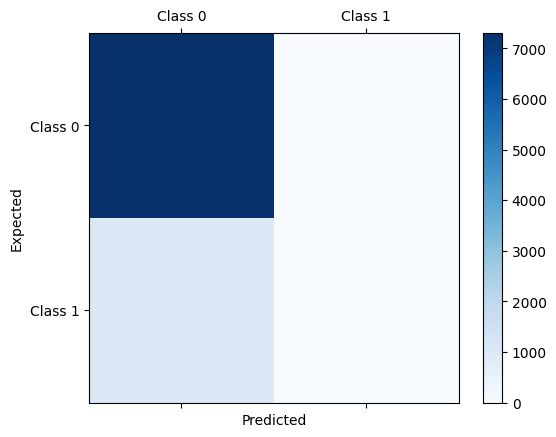

In [223]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [224]:
from sklearn.metrics import f1_score
f1_score(y_test, model.predict(X_test[['marital']]))

0.0

In [225]:
# Class count
count_class_0, count_class_1 = data.target.value_counts()

# Divide by class
data_class_0 = data[data['target'] == 0]
data_class_1 = data[data['target'] == 1]

count_class_0, count_class_1

(36292, 5235)

In [226]:
#Random Under-sampling
count_class_1, count_class_0

(5235, 36292)

Random under-sampling:
0    5235
1    5235
Name: target, dtype: int64


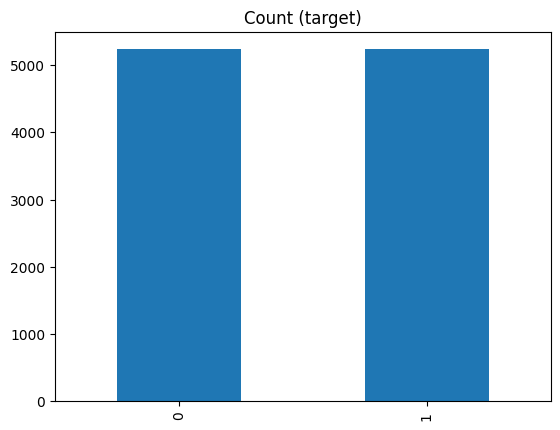

In [227]:
data_class_0_under = data_class_0.sample(count_class_1) #it will randomly sample count_class_1 number of rows from the dataframe
data_test_under = pd.concat([data_class_0_under,data_class_1], axis=0)

print('Random under-sampling:')
print(data_test_under.target.value_counts())

data_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
0    36292
1    36292
Name: target, dtype: int64


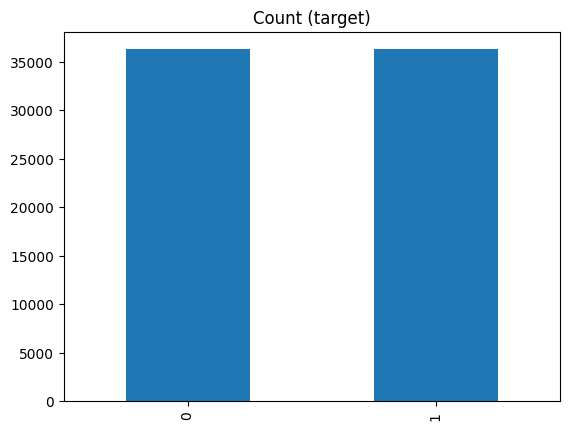

In [228]:
#Random Over-sampling
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_test_over.target.value_counts())

data_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [229]:
# Imbalanced-learn module
!pip install imblearn

In [230]:
import imblearn

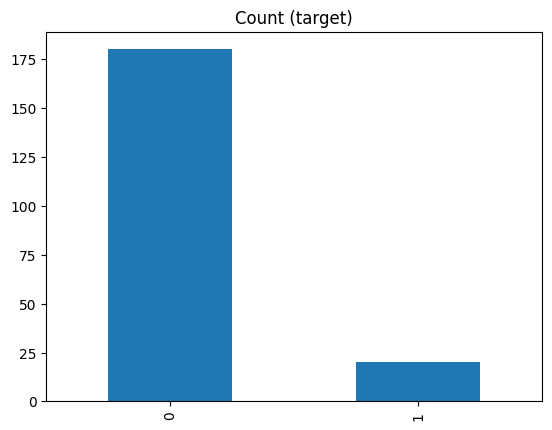

In [231]:
from sklearn.datasets import make_classification #subpackage used for creating own classifcation dataset
import pandas as pd

#generate some fake classification dataset
X, y = make_classification(
    n_classes=2, class_sep=0.75, weights=[0.9, 0.1],
    n_informative=2, n_redundant=0, flip_y=0,
    n_features=2, n_clusters_per_class=2,
    n_samples=200, random_state=10
)

data = pd.DataFrame(X)
data['target'] = y
data
data.target.value_counts().plot(kind='bar', title='Count (target)');

In [232]:
data

,0,1,target
0,0.157423,-0.374667,0
1,-0.909752,0.037925,0
2,-0.944869,-1.136125,0
3,-0.883279,-1.362500,0
4,-0.022943,1.015924,0
...,...,...,...
195,-0.272900,0.923791,0
196,-0.880549,-0.633844,0
197,-1.186294,0.943099,0
198,-1.158688,-0.399660,0


In [233]:
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

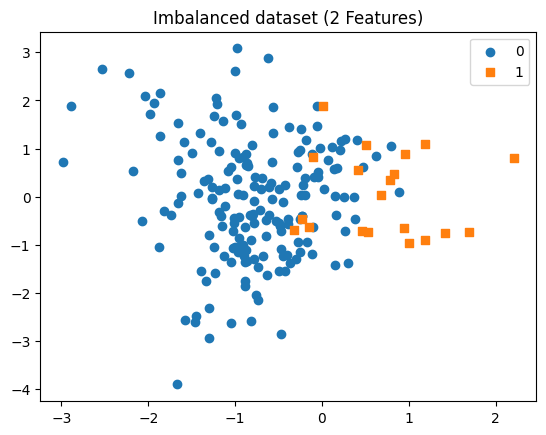

In [234]:
import matplotlib.pyplot as plt
import numpy as np

plot_2d_space(X, y, 'Imbalanced dataset (2 Features)')

In [235]:
#Random Under-sampling and Over-sampling with imbalanced-learn

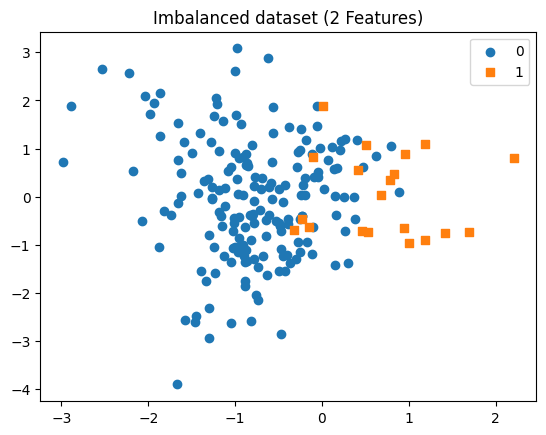

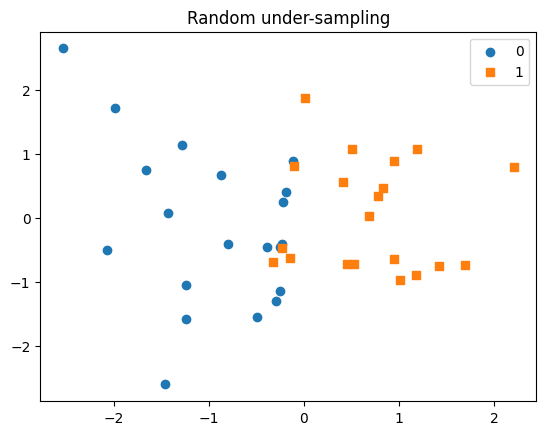

In [236]:
from imblearn.under_sampling import RandomUnderSampler #  import

rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X, y) #resampling the data

#print('Removed indexes:', id_rus)

plot_2d_space(X, y, 'Imbalanced dataset (2 Features)')
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

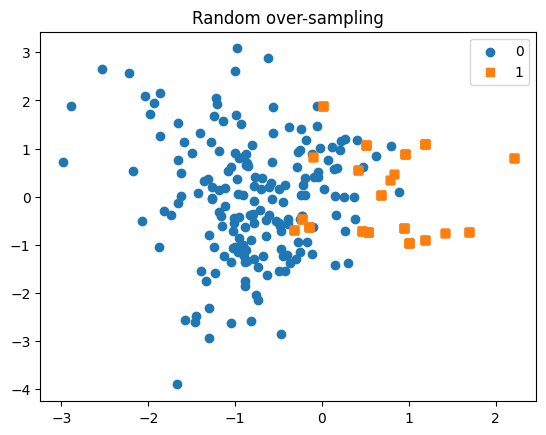

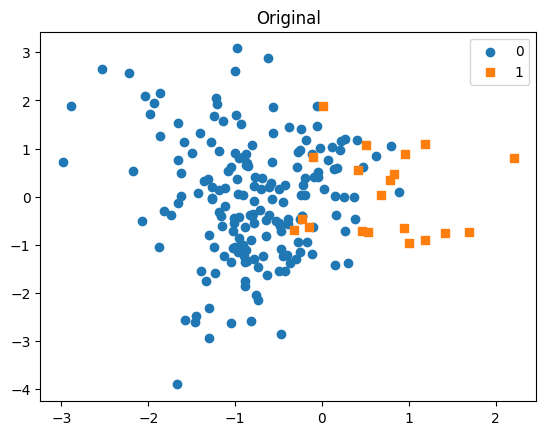

In [237]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler() #Initialis the model
X_ros, y_ros = ros.fit_resample(X, y) #Fit the model

#print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')
plot_2d_space(X, y, 'Original')

In [238]:
y_ros.sum(), y.sum(), y_rus.sum()

(180, 20, 20)

In [239]:
#Under-sampling: Cluster Centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


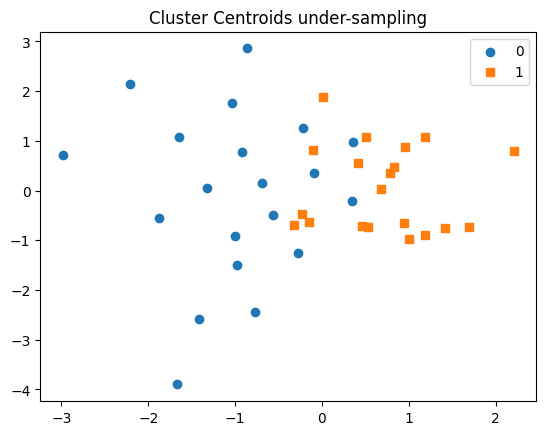

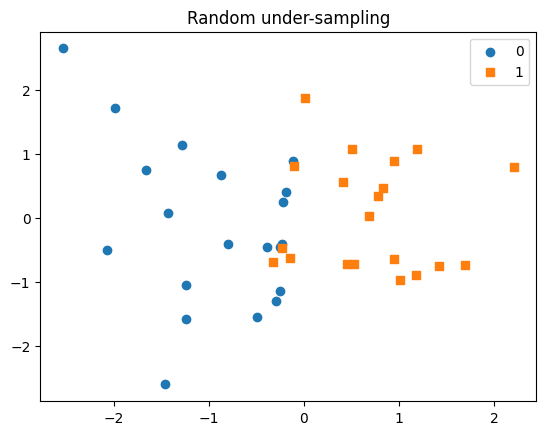

In [240]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 20})
X_cc, y_cc = cc.fit_resample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')
#plot_2d_space(X, y, 'Original')
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [241]:
y_cc.sum()/y_cc.shape[0]
#y_cc

0.5

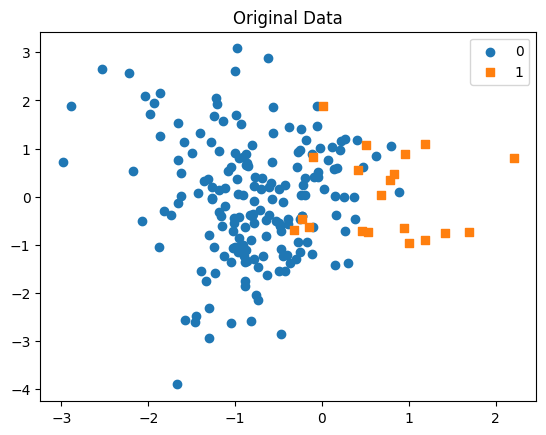

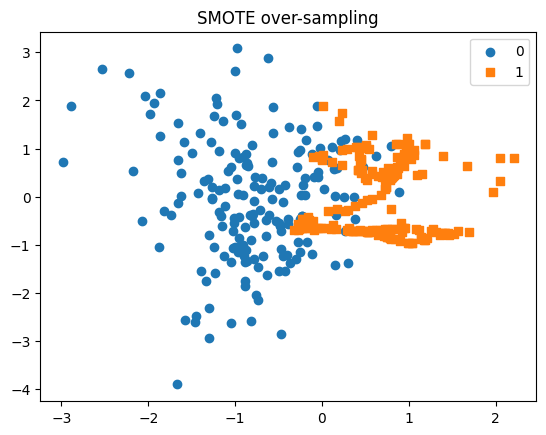

In [242]:
#Over-sampling: SMOTE
from imblearn.over_sampling import SMOTE

plot_2d_space(X, y, 'Original Data')

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

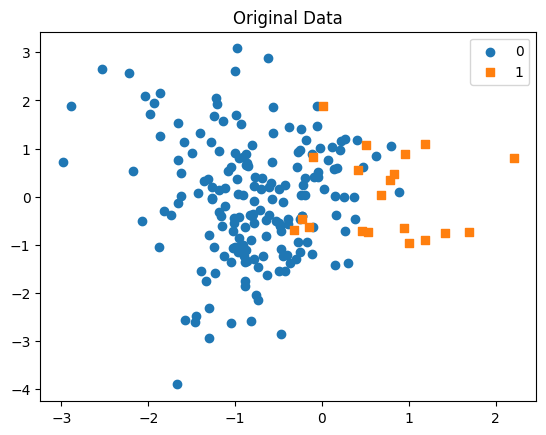

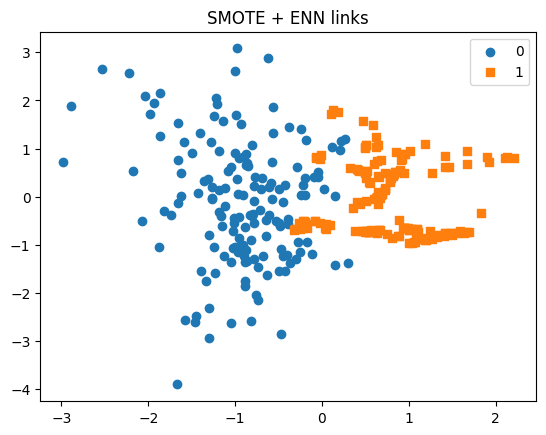

In [243]:
#Over-sampling followed by under-sampling
from imblearn.combine import SMOTEENN

plot_2d_space(X, y, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')

In [244]:
y_smt.shape

(310,)

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X,y)


print( "F1-Score on the sampled dataset : ",f1_score(y, lr.predict(X)))

F1-Score on the sampled dataset :  0.5333333333333333
